In [2]:
import os
import re
import pendulum as pendulum
from pymongo import MongoClient
import numpy as np
import pandas as pd
import time
from datetime import datetime,timedelta, timezone
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

pd.set_option('mode.chained_assignment',  None)

In [4]:
folder_path = '../raw_data/df_notecreate'
notecreate_mau_data = []


for file in sorted([file for file in os.listdir(folder_path) if file.endswith('.csv')]):
    # 파일명에서 연도와 월 정보 추출
    match = re.search(r'df_notecreate_(\d{4}_\d{2})\.csv', file)
    if match:
        year_month = match.group(1)  # 연도와 월 추출
        file_path = os.path.join(folder_path, file)
        df = pd.read_csv(file_path)
        notecreate_mau_data.append([year_month, df['userId'].nunique()])


notecreate_mau = pd.DataFrame(notecreate_mau_data, columns=['month', 'notecreate_mau'])

/tmp/ipykernel_125770/1002658954.py:11: DtypeWarning: Columns (3,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [15]:
notecreate_mau

,month,notecreate_mau
0,2022_03,126790
1,2022_04,272299
2,2022_05,269822
3,2022_06,262362
4,2022_07,215476
5,2022_08,224709
6,2022_09,294463
7,2022_10,312341
8,2022_11,295834
9,2022_12,271667


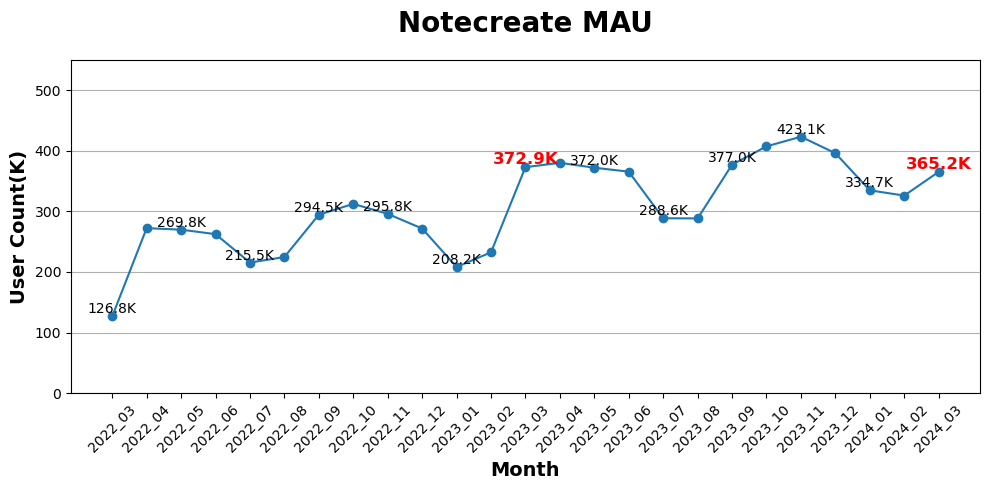

In [9]:
# 라인 그래프
plt.figure(figsize=(10, 5))
plt.plot(notecreate_mau['month'], notecreate_mau['notecreate_mau'], marker='o', linestyle='-')
plt.title('Notecreate MAU', fontsize = 20, fontweight = 'bold', pad = 20)
plt.xlabel('Month', fontsize = 14, fontweight = 'bold')
plt.ylabel('User Count(K)', fontsize = 14, fontweight = 'bold')

max_value = notecreate_mau['notecreate_mau'].max()
max_ylim = max_value * 1.3
plt.ylim(0, max_ylim)

plt.xticks(rotation=45)
plt.grid(axis = 'y')

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x/1000)))

highlight_months = {'2024_03', '2023_03'}

for i in range(len(notecreate_mau)):
    month = notecreate_mau['month'][i]
    txt = notecreate_mau['notecreate_mau'][i]
    if month in highlight_months:
        plt.text(month, txt, f'{txt / 1000:.1f}K', ha='center', va='bottom', color='red', fontsize=12, fontweight='bold')
    else:
        if i % 2 == 0:
            plt.text(month, txt, f'{txt / 1000:.1f}K', ha='center', va='bottom')

plt.tight_layout()

# plt.savefig('graph/2. notecreate_mau_graph.png', dpi=300)
plt.show()